In [1]:
#Importing Libraries required for data loading data preprocessing,transformation and encoding 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#Reading adult income dataset file to dataframe
df=pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# describing the dataframe:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#code to check count of special characters in dataframe 
(df == "?").sum().sum()

6465

In [7]:
#Function to replace special characters to NaN value
def replace_data(df):
    
    return df.replace('?', np.nan)

In [8]:
#Function call to replace special characters with NaN value
df = replace_data(df)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
#Code to check if special characters exists after replacing with NaN values
(df == "?").sum().sum()

0

In [10]:
#Code to check number of NaN values in column workclass
df['workclass'].isna().sum()

2799

In [11]:
#Code to check number of NaN values in column occupation
df['occupation'].isna().sum()

2809

In [12]:
#Code to check number of NaN values in column native-country
df['native-country'].isna().sum()

857

In [13]:
#Define function to replace NaN values in category columns with mode values in columns workclass,occupation,native-country
def fill_missing_data(dataframe,columns):
    df2=dataframe.copy()
    for column in columns:
        if column in df2.columns:
            mode_val = df2[column].mode()[0]  
            df2[column].fillna(mode_val, inplace=True)  # Fill missing values with mode
    return df2    

In [14]:
#Function call to impute missing values in dataframe
columns_to_fill=['workclass','occupation','native-country']
df_new = fill_missing_data(df, columns_to_fill)

In [15]:
#Code to check if there exists any missing values in column workclass after imputation
df_new['workclass'].isna().sum()

0

In [16]:
#Code to check if there exists any missing values in column occupation after imputation
df_new['occupation'].isna().sum()

0

In [17]:
#Code to check if there exists any missing values in column native-country after imputation
df_new['native-country'].isna().sum()

0

In [18]:
df_new

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
#Function to convert values in target column income with class 0 and class 1
def classification(dataframe):
     df_new['income'] = df['income'].apply(lambda x: class_1_value if x >= threshold else class_0_value)
     return df_new        

In [20]:
#Defining variables class and function call to replace target class as 0 and 1
threshold ='>50K'
class_1_value = 1
class_0_value = 0
classification(df_new)
df_new

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [21]:
#Code to calculate number of counts in class 0 and 1
df_new['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [22]:
#Function to replace minority country class as other and majority as United states
def countries(dataframe):
    countries = np.array(df_new['native-country'].unique())
    countries = np.delete(countries, 0)
    df_new['native-country'].replace(countries, 'Other', inplace = True)
    return df_new

In [23]:
#Function call to countries  
countries(df_new)
df_new

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [24]:
df_new['native-country'].value_counts()

United-States    44689
Other             4153
Name: native-country, dtype: int64

# Univariate Analysis

Text(0.5, 1.0, 'Count of records of classes with income >50k and less than 50K')

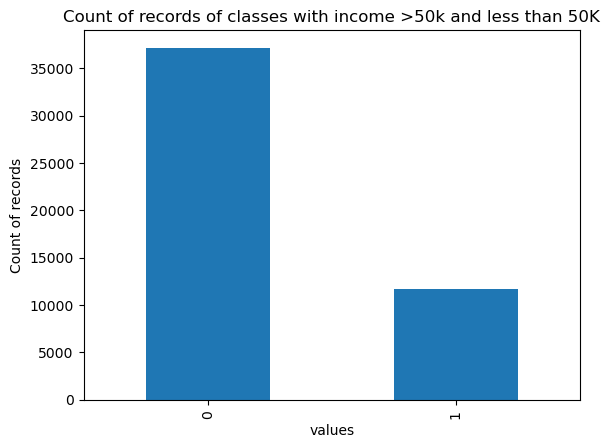

In [25]:
#Creating bar plot for classes of income column and count of number of classes 1 and 0
df_new['income'].value_counts().plot(kind='bar')
plt.xlabel('values')
plt.ylabel('Count of records')
plt.title('Count of records of classes with income >50k and less than 50K')

Text(0.5, 1.0, 'Count of records of people based on gender')

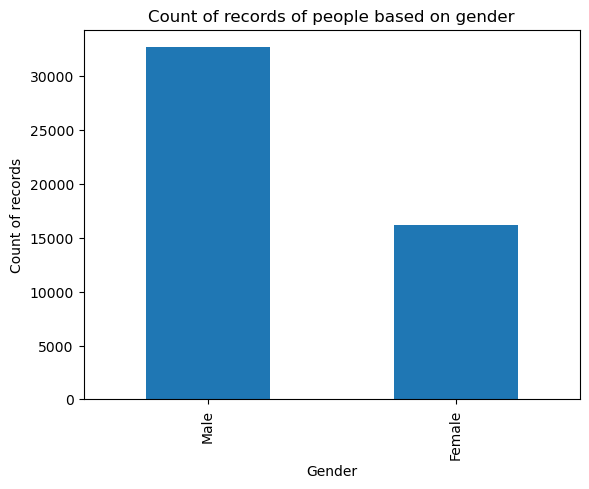

In [26]:
#Creating bar plot for Gender and count of number of males and females
df_new['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count of records')
plt.title('Count of records of people based on gender')

Text(0.5, 1.0, 'Count of records of people based on education')

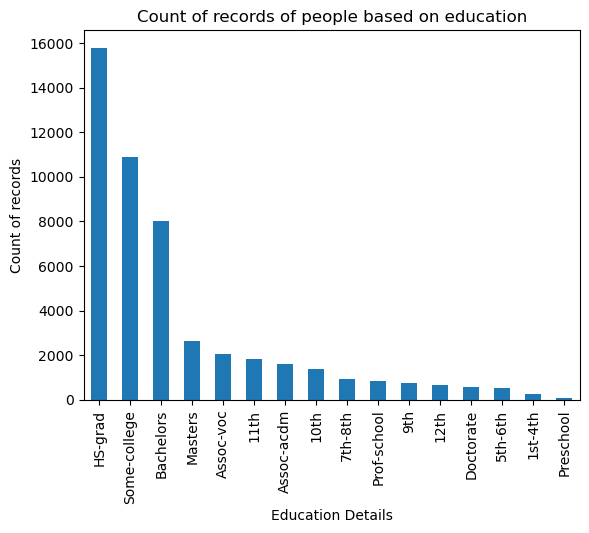

In [27]:
##Creating bar plot for education to check count of people that belong to different education levels
df_new['education'].value_counts().plot(kind='bar')
plt.xlabel('Education Details')
plt.ylabel('Count of records')
plt.title('Count of records of people based on education')

In [28]:
numerical_attributes = df_new.select_dtypes(include=['int'])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'educational-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: title={'center': 'income'}>, <Axes: >, <Axes: >]],
      dtype=object)

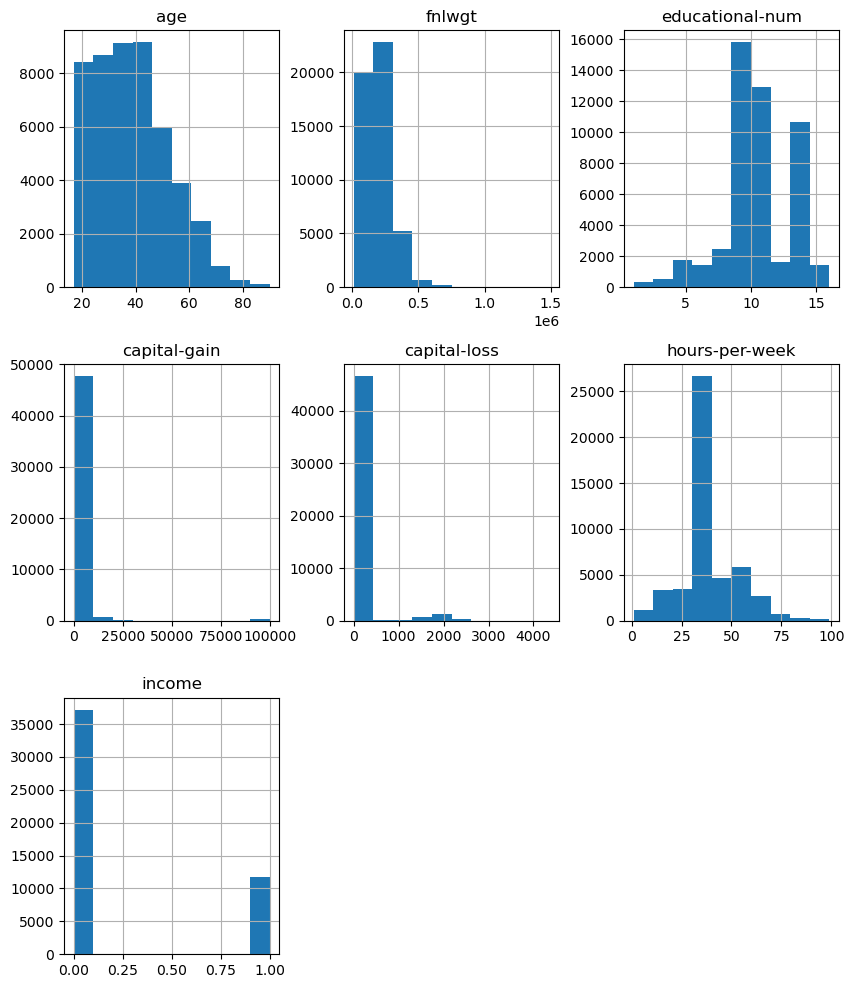

In [29]:
#Creating histogram for numerical columns of dataframe to check distribution of data
numerical_attributes.hist(figsize=(10,12))

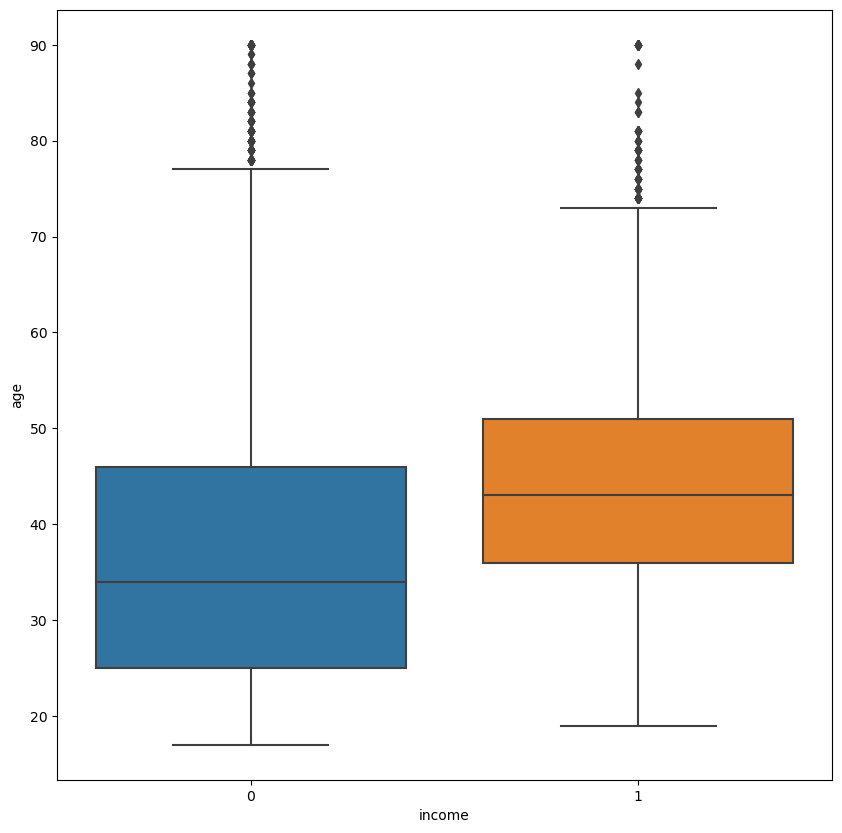

In [30]:
#  AGE Boxplot (Relationship with income)

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=df_new)
plt.show()

In [31]:
df_new[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.275178
0,0,36.872184


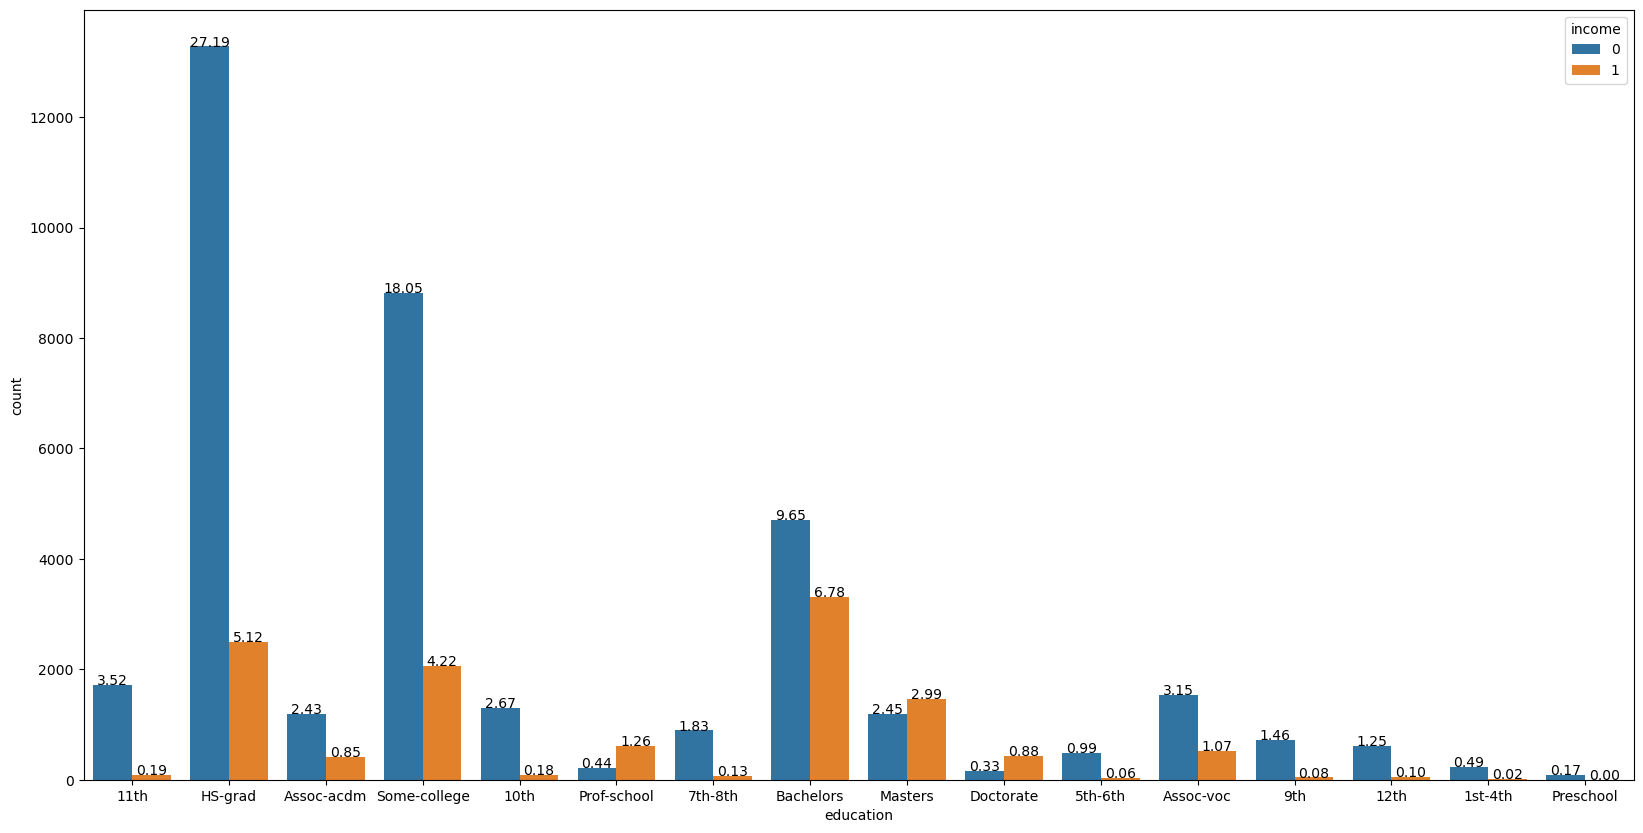

In [32]:
#Education Barplot (Relationa with income)

plt.figure(figsize=(20,10))
total = float(len(df["income"]) )

ax = sns.countplot(x="education", hue="income", data=df_new)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

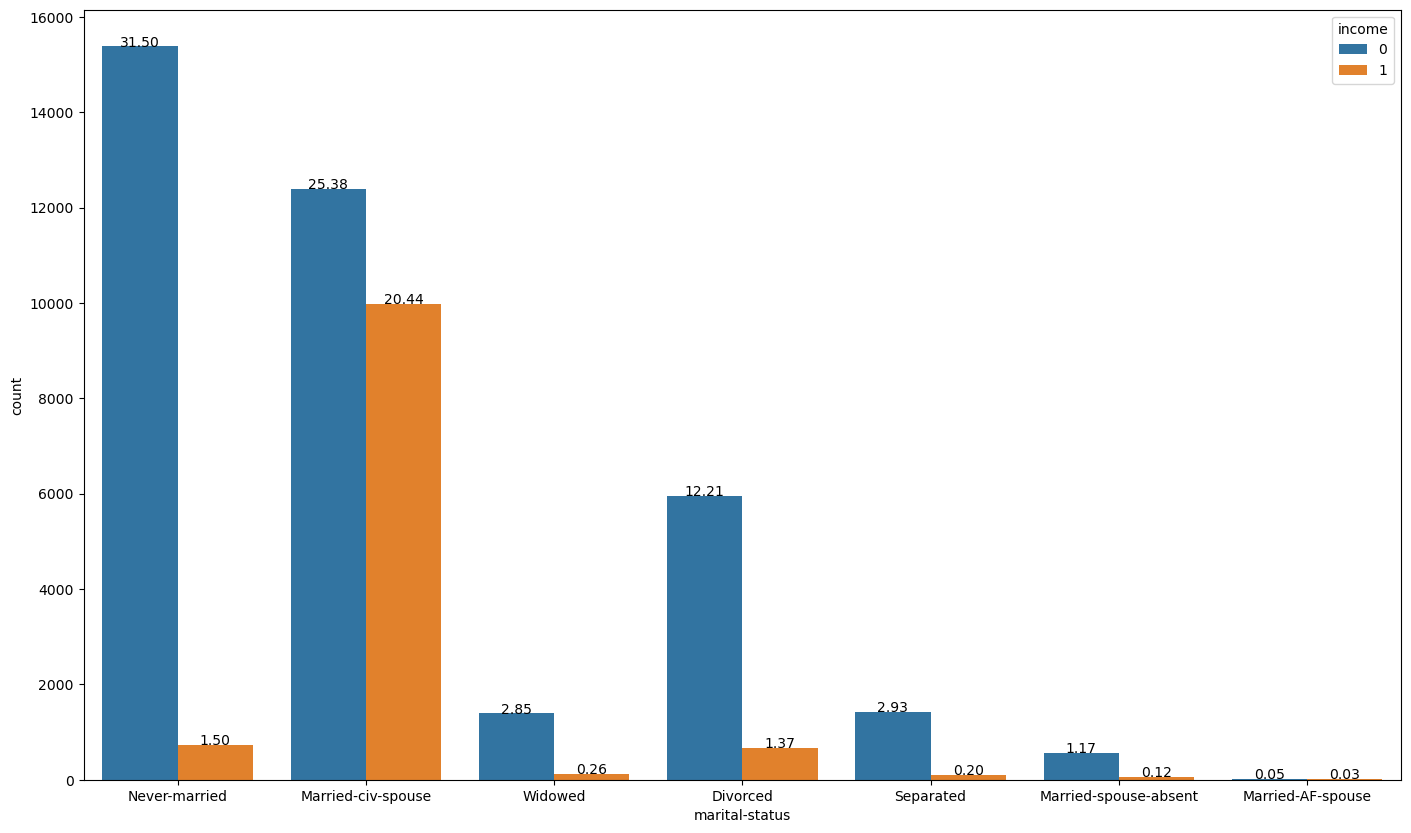

In [33]:
#Marital status Barplot (Relationa with income)

plt.figure(figsize=(17,10))
total = float(len(df) )

ax = sns.countplot(x="marital-status", hue="income", data=df_new)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

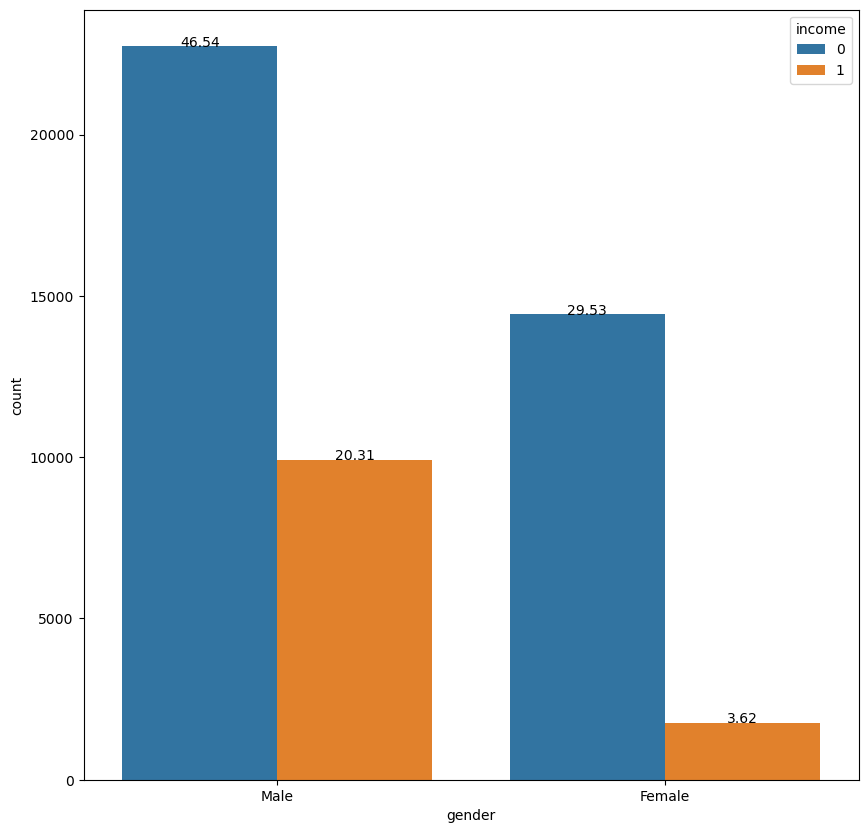

In [34]:
#Gender status Barplot (Relationa with income)

plt.figure(figsize=(10,10))
total = float(len(df) )

ax = sns.countplot(x="gender", hue="income", data=df_new)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

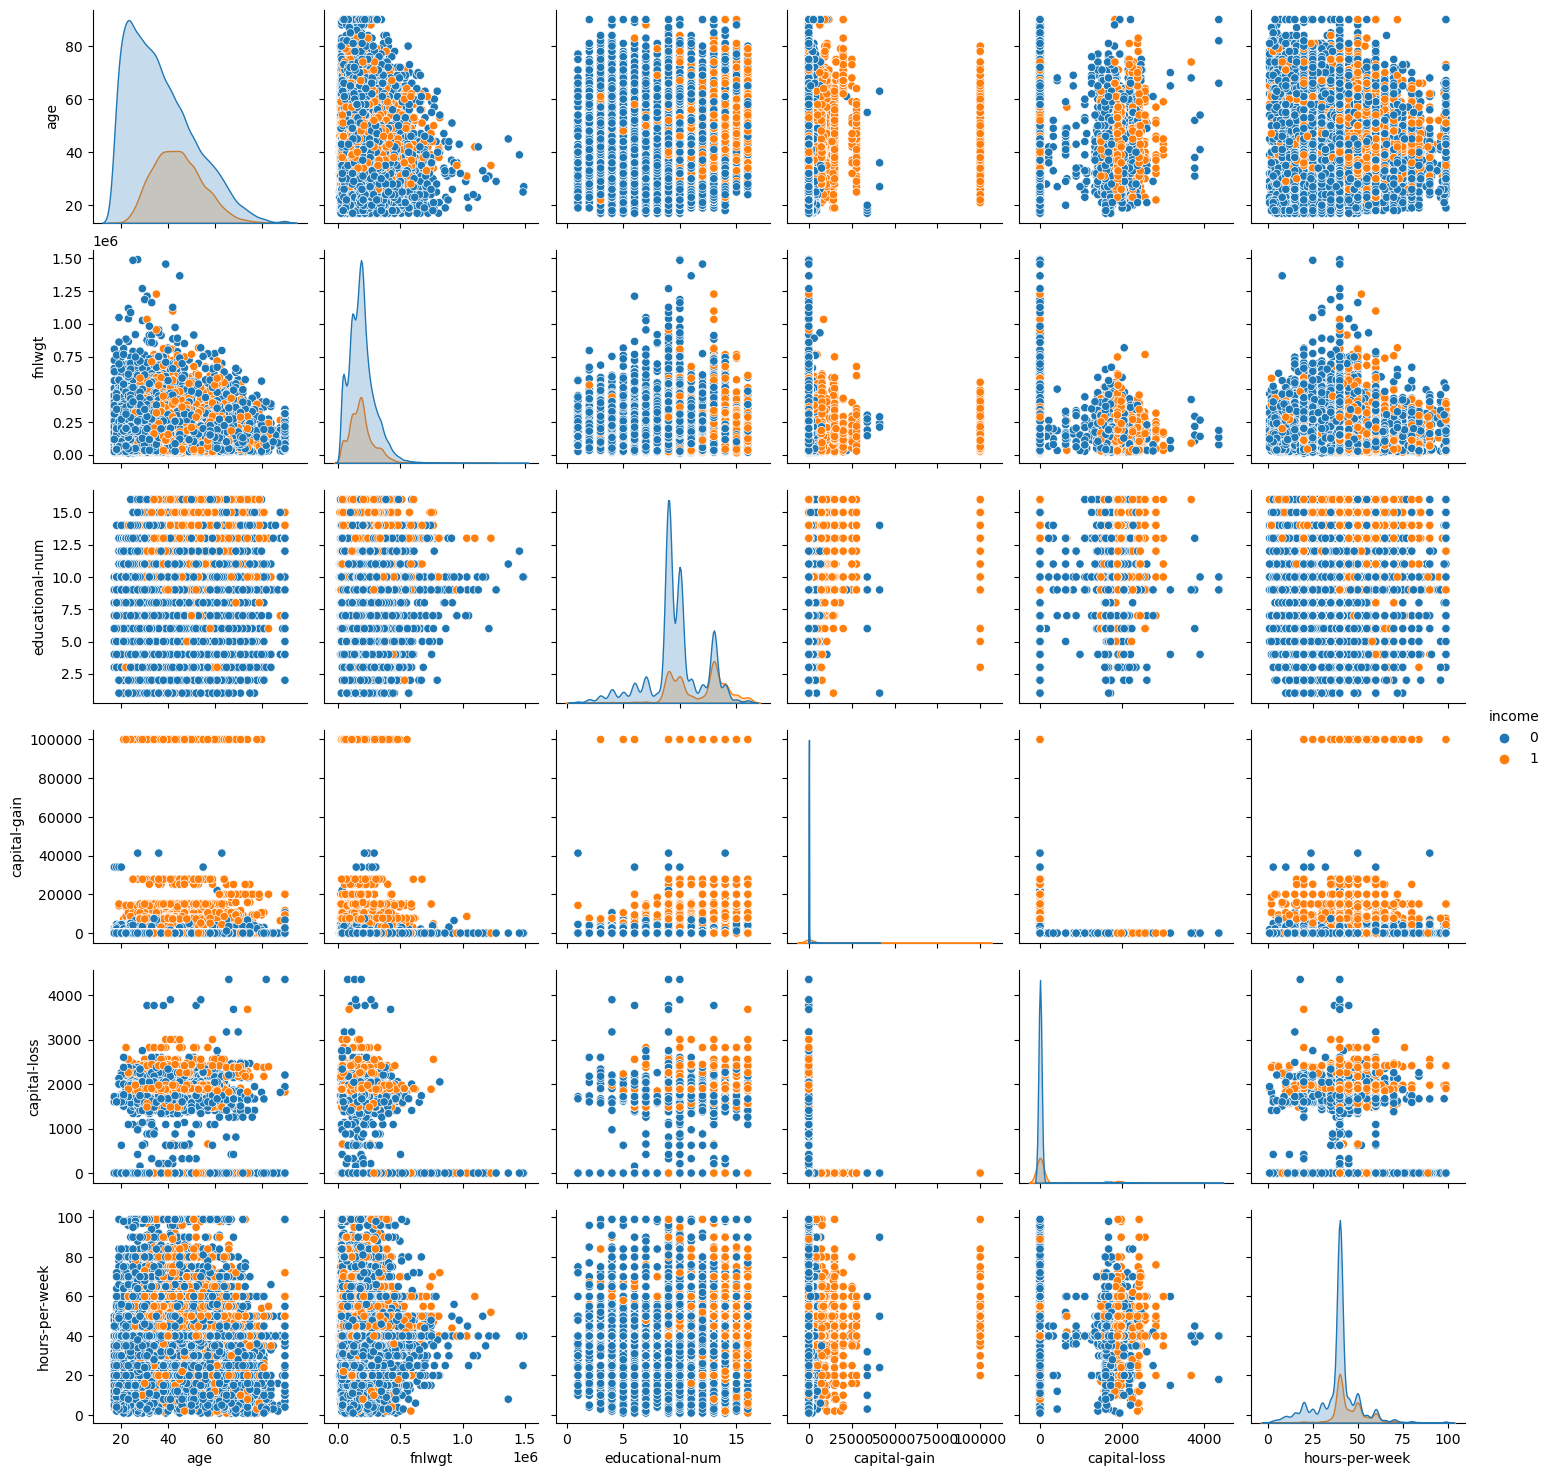

In [35]:
sns.pairplot(df_new ,hue='income')

/var/folders/v4/m_x1gf993lj0bk5k0p03vnl80000gn/T/ipykernel_24257/4244878282.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(),annot=True,linewidths=.5, cmap="Blues", fmt='.1f')


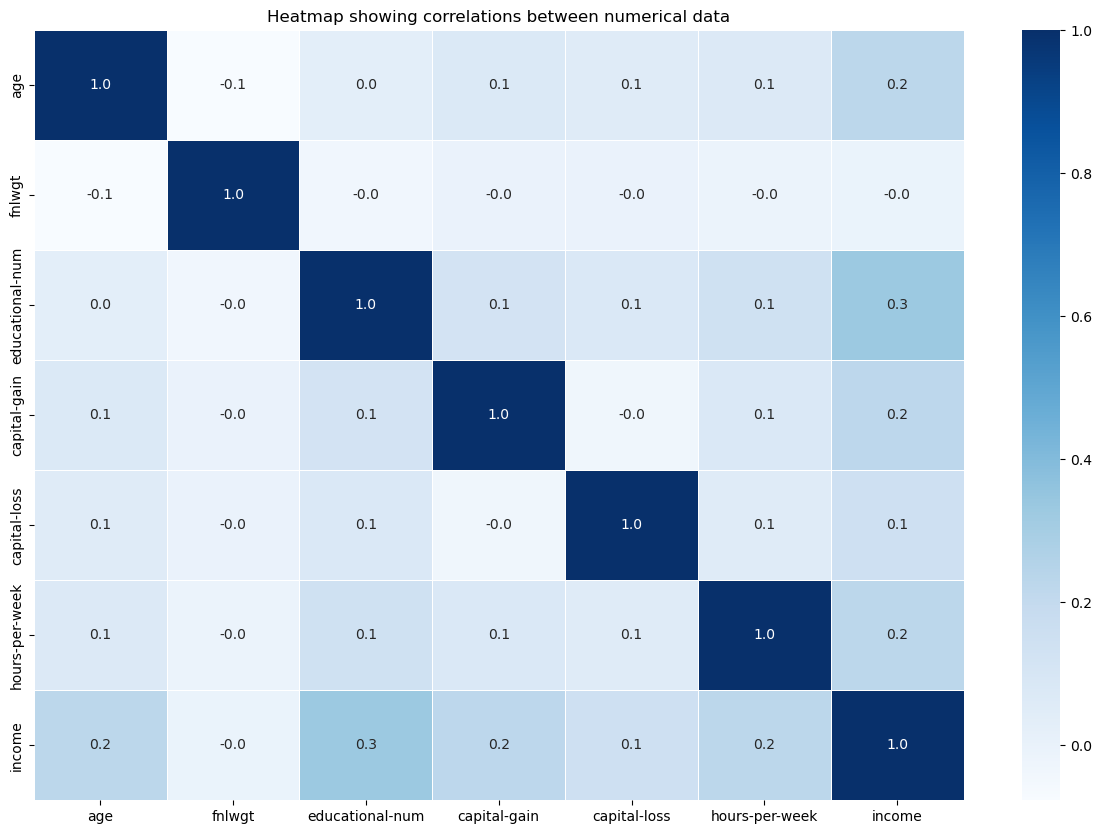

In [36]:
#Heat map of dataframe to check multi collinearity among attributes
plt.figure(figsize=(15,10))  
#sns.heatmap(data_num.corr(),annot=True,linewidths=.5, cmap="Blues")
sns.heatmap(df_new.corr(),annot=True,linewidths=.5, cmap="Blues", fmt='.1f')
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [37]:
#Applying label encoding to dataframe to convert categorical columns in dataframe to numerical
df_new=df_new.apply(LabelEncoder().fit_transform)

In [38]:
df_new

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,1,6,4,6,3,2,1,0,0,39,1,0
1,21,3,4212,11,8,2,4,0,4,1,0,0,49,1,0
2,11,1,25340,7,11,2,10,0,4,1,0,0,39,1,1
3,27,3,11201,15,9,2,6,0,2,1,98,0,39,1,1
4,1,3,5411,15,9,4,9,3,4,0,0,0,29,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,10,3,21582,7,11,2,12,5,4,0,0,0,37,1,0
48838,23,3,10584,11,8,2,6,0,4,1,0,0,39,1,1
48839,41,3,10316,11,8,6,0,4,4,0,0,0,39,1,0
48840,5,3,16813,11,8,4,0,3,4,1,0,0,19,1,0


In [39]:
#Creating variable y to populate target data income 
y=df_new['income']

In [40]:
#Creating dataframe X by dropping dependent variable column of dataframe
X=df_new.iloc[:, :-1]

In [41]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [42]:
type(y)

pandas.core.series.Series

# Baseline Model

In [43]:
# Function for baseline model using K-fold cross validation
def load_data():
    X4, y4 = df.iloc[:, :-1], df.iloc[:, -1]
    cate_index = X4.select_dtypes(include=['object']).columns
    num_index = X4.select_dtypes(include=['int64', 'float64']).columns
    y4 = LabelEncoder().fit_transform(y)
    
    return X4, y4, cate_index, num_index

def evaluate_model(X4, y4, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X4, y4, scoring='accuracy', cv=cv, n_jobs=-1)
    
    return scores

In [44]:
# Baseline model using dummy classifier assigning label of most frequent class 
from sklearn.dummy import DummyClassifier

X4, y4, cate_index, num_index = load_data()
model = DummyClassifier(strategy='most_frequent')
scores = evaluate_model(X4, y4, model)
print(scores)
print(f"The Dummy Classifier mean accuracy: {(np.mean(scores)*100):.2f}%")

[0.76069601 0.76069601 0.76085176 0.76085176 0.76085176 0.76064701
 0.76064701 0.76064701 0.76064701 0.76064701 0.76069601 0.76069601
 0.76085176 0.76085176 0.76085176 0.76064701 0.76064701 0.76064701
 0.76064701 0.76064701 0.76069601 0.76069601 0.76085176 0.76085176
 0.76085176 0.76064701 0.76064701 0.76064701 0.76064701 0.76064701]
The Dummy Classifier mean accuracy: 76.07%


In [45]:
type(y)

pandas.core.series.Series

In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
df_new=df_new.apply(LabelEncoder().fit_transform)

In [48]:
y=df_new['income']

In [49]:
X=df_new.iloc[:, :-1]

In [50]:
#Creating train test variables and splitting data as 80% training and 20 % testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#Count of number of records on train and test dependent and independent variables 
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39073, 14)
X_test shape: (9769, 14)
y_train shape: (39073,)
y_test shape: (9769,)


# Modeling

In [52]:
#Importing classifier libraries Decision tree,Random Forest,KNN,SVM,Gradient Boosting,Logistic Regression 
#classification report and accuracy metrics 
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [53]:
#Defining function to train model,display accuracy on testing data  and classification metrics of model 
def models(X_train,y_train):

    accuracy_scores={}

    models = {
           'Base line Model':DummyClassifier(strategy='most_frequent'),
           'Decision Tree':DecisionTreeClassifier(),
           'Random Forest':RandomForestClassifier(),
           'Logistic Regression':LogisticRegression(),
           'K-Nearest Neighbour':KNeighborsClassifier(),
           'Support Vector Machine':SVC(),
           'Gradient Boosting Classifier':GradientBoostingClassifier()
    }

    for model_name,model in models.items():
        model.fit(X_train, y_train)
    
        y_pred=model.predict(X_test)
        accuracy=accuracy_score(y_test,y_pred)
        accuracy_scores[model_name]=accuracy
        print("=" * 50)
        print('classification report of model',model_name)
        print("=" * 50)
        report= classification_report(y_test, y_pred)
        print(report)
        
    sorted_scores=sorted(accuracy_scores.items(),key=lambda x:x[1],reverse=True)
    print("=" * 50)
    print('Model Rankings based on Accuracy Score:')
    for rank,(model_name,accuracy) in enumerate(sorted_scores,start=1):
        print(f"Rank {rank}: {model_name} -Accuracy: {accuracy:4f}")
    print("=" * 50)
    return

In [54]:
#Function call to models 
models(X_train,y_train)

classification report of model Base line Model
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7479
           1       0.00      0.00      0.00      2290

    accuracy                           0.77      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.59      0.77      0.66      9769

classification report of model Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7479
           1       0.60      0.62      0.61      2290

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.75      9769
weighted avg       0.82      0.81      0.82      9769

classification report of model Random Forest
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.73      0.64      0.69      2290

    accuracy                           0.86  

# Modeling after Normalization, feature selection and hyperparameter tuning

In [55]:
# Function to create a df with above data cleaning steps without the label encoding
(df == "?").sum().sum()
def replace_data(df):
    
    return df.replace('?', np.nan)

def fill_missing_data(dataframe,columns):
    df2=dataframe.copy()
    for column in columns:
        if column in df2.columns:
            mode_val = df2[column].mode()[0]  
            df2[column].fillna(mode_val, inplace=True)  # Fill missing values with mode
    return df2    

columns_to_fill=['workclass','occupation','native-country']
df3 = fill_missing_data(df, columns_to_fill)

def classification(dataframe):
     df3['income'] = df['income'].apply(lambda x: class_1_value if x >= threshold else class_0_value)
     return df3

threshold ='>50K'
class_1_value = 1
class_0_value = 0
classification(df3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [56]:
#creating a train - test split of 80% train data and 20% test data
y1=df3['income']
X1=df3.iloc[:, :-1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [57]:
#Data normalization on numerical columns

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data. We then use the same mean and variance to normalize the test data.
scaler.fit(X1_train.select_dtypes("int64"))  
train_data = scaler.transform(X1_train.select_dtypes("int64"))  
train_data=pd.DataFrame(train_data)
train_data.columns = [
    "Age", "fnlwgt", "EducationNum",
    "CapitalGain", "CapitalLoss", "HoursPerWeek"]  
train_data.set_index(X1_train.index,inplace=True)

In [58]:
# Data Preparation using One hot encoding

training_data_categorical = pd.get_dummies(X1_train.select_dtypes('object'))
training_data_categorical=training_data_categorical.astype(dtype='category')
training_data_non_categorical = train_data                                          

training_data_onehotencoded = pd.concat([training_data_non_categorical, training_data_categorical], axis=1,join='inner')

In [59]:
#Feature selection: Select K best features

from sklearn.feature_selection import SelectKBest,chi2
np.seterr(divide='ignore',invalid='ignore')
kbest_selector=SelectKBest(k=training_data_onehotencoded.shape[1])

training_selected_features=kbest_selector.fit_transform(training_data_onehotencoded,y1_train)

selected_cols = kbest_selector.get_support(indices=True)
selected_feature_names = training_data_onehotencoded.columns.values[selected_cols]

training_selected_features=pd.DataFrame(training_selected_features)

scores = kbest_selector.scores_[kbest_selector.get_support()]
selected_feature_names_scores = list(zip(selected_feature_names, scores))

Feat_F1score_combined = pd.DataFrame(data = selected_feature_names_scores, columns=['Feature_names', 'F_Scores'])
Feat_F1score_combined = Feat_F1score_combined.sort_values(['F_Scores', 'Feature_names'], ascending = [False, True])

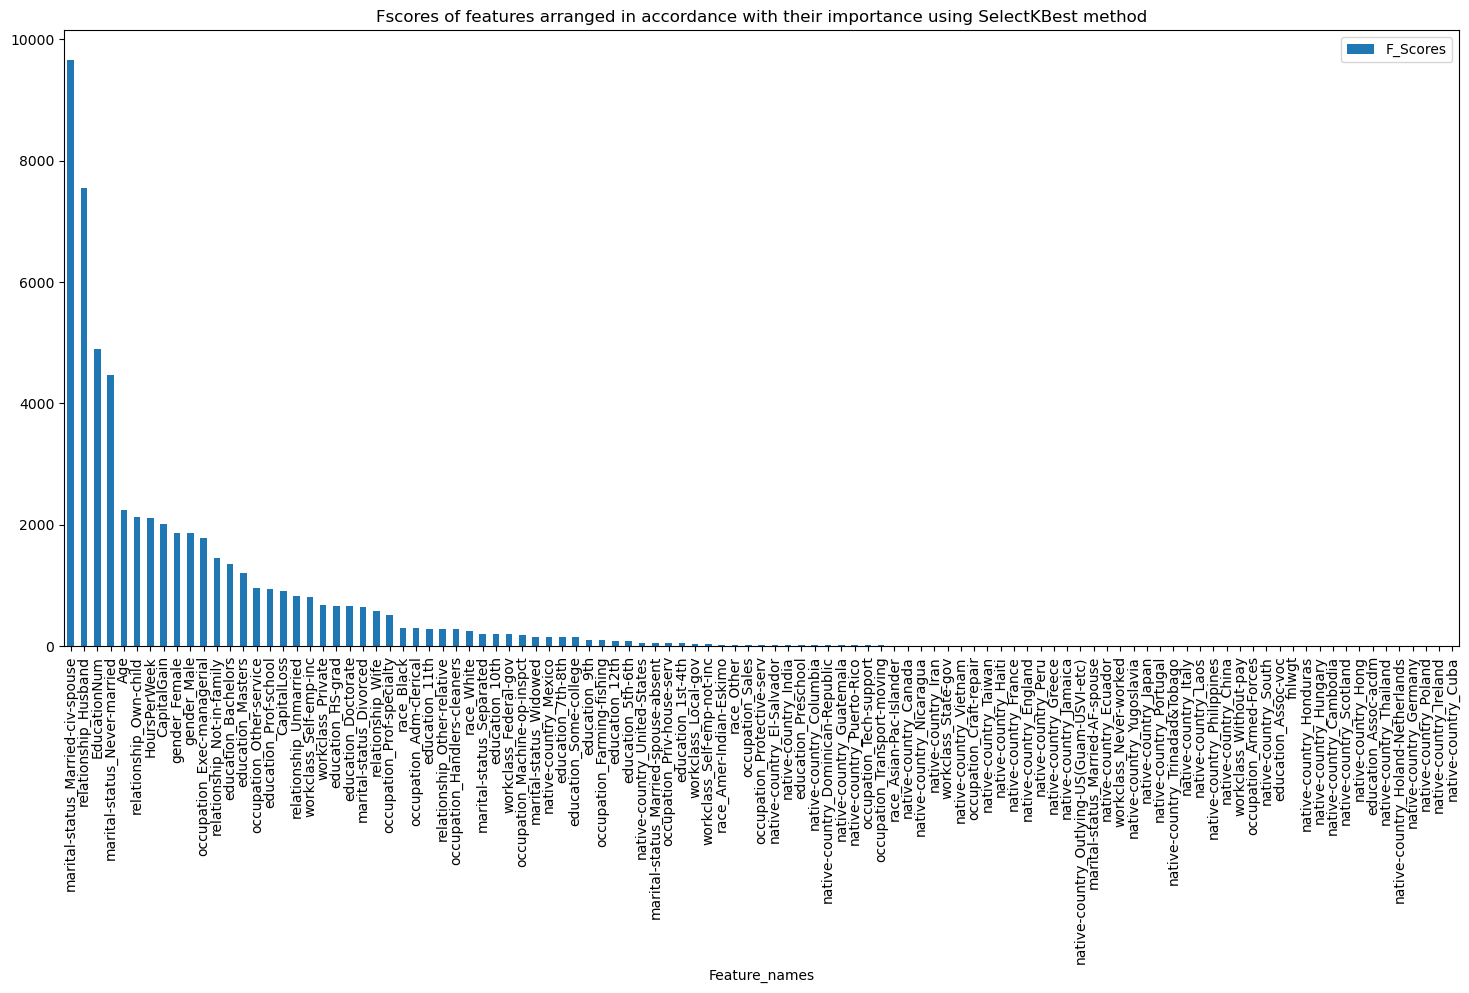

In [60]:
#Feature importance having features with scores more than 30 as got from k-best method 
# Option 1 - transforming these features using same method

Feat_F1score_combined.plot(x='Feature_names',y='F_Scores',kind='bar',title='Fscores of features arranged in accordance with their importance using SelectKBest method',figsize=(18,8))
#Setting the F score threshold as 30, we get a total of 30 features which have F scores beyond this value

kbest_selector=SelectKBest(k=30)
training_selected_features=kbest_selector.fit_transform(training_data_onehotencoded,y1_train)

In [61]:
#Converting the dataframes to numpy array format
train_data_array=np.asarray(training_selected_features)
training_label_array=np.asarray(y1_train)

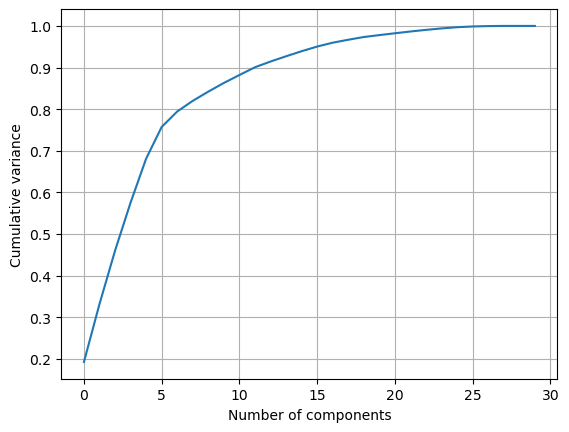

In [62]:
# Option 2 - Performing PCA transformation using K-best selected features

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(training_selected_features)

training_features_transformed = pca.transform(training_selected_features)

from matplotlib import pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))   # As can be seen we take 30 components which captures almost all the variance
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance')
plt.grid('True')
'''

'''
from sklearn.decomposition import PCA
pca = PCA(0.95)   #Select those many components that capture 95% of the variance 
pca.fit(training_selected_features)

training_features_transformed = pca.transform(training_selected_features)

train_data_array=np.asarray(training_features_transformed)
training_label_array=np.asarray(y1_train)

In [63]:
# Performing normalization on test dataset
test_data = scaler.transform(X1_test.select_dtypes("int64"))  
test_data=pd.DataFrame(test_data)
test_data.columns = [
    "Age", "fnlwgt", "EducationNum",
    "CapitalGain", "CapitalLoss", "HoursPerWeek"]  
test_data.set_index(X1_test.index,inplace=True)

# Data Prep using One hot encoding (on test data)

testing_data_categorical = pd.get_dummies(X1_test.select_dtypes('object'))
testing_data_categorical=testing_data_categorical.astype(dtype='category')
testing_data_non_categorical =   test_data                                       

testing_data_onehotencoded = pd.concat([testing_data_non_categorical, testing_data_categorical], axis=1,join='inner')


In [64]:
# Matching the # of columns in the training data post one hot encoding
missing_test_col_set = set(training_data_onehotencoded.columns.values.tolist()).difference(testing_data_onehotencoded.columns.values.tolist())

for col in missing_test_col_set:
    testing_data_onehotencoded[col] = 0

# Make sure the order of columns in testing_data_onehotencoded matches training_data_onehotencoded
testing_data_onehotencoded = testing_data_onehotencoded[training_data_onehotencoded.columns]

In [65]:
# Now apply feature selection using Kbest Selector 
#option1 - Transforming the selected features using kbest 
testing_selected_features = kbest_selector.transform(testing_data_onehotencoded)


# Matching the # of columns in the training data post one hot encoding
missing_test_col_set = set(training_data_onehotencoded.columns.values.tolist()).difference(testing_data_onehotencoded.columns.values.tolist())

for col in missing_test_col_set:
    testing_data_onehotencoded[col] = 0


testing_data_onehotencoded = testing_data_onehotencoded[training_data_onehotencoded.columns]


In [66]:
#option 2 - transforming the Kbest selected features using PCA
testing_features_transformed = pca.transform(testing_selected_features)
from sklearn.decomposition import PCA
testing_features_transformed = pca.transform(testing_selected_features)

In [67]:
# SVM model using linear kernel hyperparameter tuning - finding the optimal parameters on the training dataset

import numpy as np
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score



C_val = np.logspace(-2, 0, num=3)  
gamma_val = np.logspace(-2, 0, num=3)  

param_grid = {'C': C_val, 'gamma': gamma_val}
svm_clf = svm.SVC(kernel='linear')

fold = StratifiedKFold(n_splits=5, shuffle=True)  

grid_search = GridSearchCV(svm_clf, param_grid, cv=fold)

subset_size = int(0.1 * len(train_data_array))  
grid_search.fit(train_data_array[:subset_size], training_label_array[:subset_size])

print("Best Training Accuracy (GridSearchCV):", grid_search.best_score_)
optimal_gamma = grid_search.best_params_['gamma']
optimal_C = grid_search.best_params_['C']
print("Optimal Hyper parameters: gamma: %.3f, C: %.3f" % (optimal_gamma, optimal_C))

Best Training Accuracy (GridSearchCV): 0.8533469124442072
Optimal Hyper parameters: gamma: 0.010, C: 1.000


In [68]:
#Testing using SVM classifier with linear kernel using the above optimal hyperparameters

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

svm_clf=svm.SVC(kernel='linear',C=optimal_C,gamma=optimal_gamma)
svm_clf.fit(training_selected_features,y1_train)

predicted_label = svm_clf.predict(testing_selected_features)
testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.8468625243115979
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7479
           1       0.72      0.56      0.63      2290

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

0.7484998753423706


In [69]:
#Testing using SVM classifier with linear kernel using PCA

svm_clf=svm.SVC(kernel='linear',C=optimal_C,gamma=optimal_gamma)
svm_clf.fit(training_features_transformed,y1_train)

predicted_label = svm_clf.predict(testing_features_transformed)
testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)

report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.8508547446002661
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7479
           1       0.73      0.58      0.65      2290

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

0.7562577254157348


In [70]:
#Testing using penalized SVM classifier with linear kernel

svm_clf=svm.SVC(kernel='linear',C=optimal_C,gamma=optimal_gamma,class_weight='balanced')
svm_clf.fit(training_selected_features,y1_train)

predicted_label = svm_clf.predict(testing_selected_features)
testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)

report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.7807349779916061
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      7479
           1       0.52      0.88      0.65      2290

    accuracy                           0.78      9769
   macro avg       0.74      0.82      0.75      9769
weighted avg       0.85      0.78      0.80      9769

0.816049100509082


In [71]:
#Testing using penalized SVM classifier with linear kernel using PCA

svm_clf=svm.SVC(kernel='linear',C=optimal_C,gamma=optimal_gamma,class_weight='balanced')
svm_clf.fit(training_features_transformed,y1_train)

predicted_label = svm_clf.predict(testing_features_transformed)
testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)

report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.7741836421332787
              precision    recall  f1-score   support

           0       0.96      0.74      0.83      7479
           1       0.51      0.89      0.65      2290

    accuracy                           0.77      9769
   macro avg       0.73      0.82      0.74      9769
weighted avg       0.85      0.77      0.79      9769

0.8152546489705381


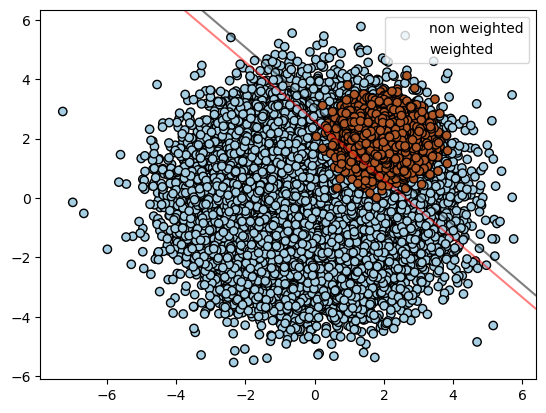

In [72]:
# To visualize the performance difference between normal and weighted(penalized) SVM with linear kernel
#This portion of the code has been taken from the scikit-learn documnetation examples

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = y1_train.value_counts().iloc[0]
n_samples_2 = y1_train.value_counts().iloc[1]
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X3, y3 = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=optimal_C,gamma=optimal_gamma)
clf.fit(X3, y3)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight='balanced',C=optimal_C,gamma=optimal_gamma)
wclf.fit(X3, y3)

# plot the samples
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

legend_entries = [
    Line2D([0], [0], color='k', linewidth=1.5, label='non weighted'),
    Line2D([0], [0], color='y', linewidth=1.5, label='weighted')]

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],loc="upper right")
plt.show()


# SVM with RBF kernel

In [73]:
# SVM model using rbf kernel hyperparameter tuning - finding the optimal parameters on the training dataset

C_val = np.logspace(-2, 0, num=3)  
gamma_val = np.logspace(-2, 0, num=3)  

param_grid = {'C': C_val, 'gamma': gamma_val}
svm_clf = svm.SVC(kernel='rbf')  # Using RBF kernel

fold = StratifiedKFold(n_splits=5, shuffle=True)  #number of folds to 3

grid_search = GridSearchCV(svm_clf, param_grid, cv=fold)

subset_size = int(0.2 * len(train_data_array))  # For 10% subset size
grid_search.fit(train_data_array[:subset_size], training_label_array[:subset_size])

print("Best Training Accuracy (GridSearchCV):", grid_search.best_score_)
optimal_gamma = grid_search.best_params_['gamma']
optimal_C = grid_search.best_params_['C']
print("Optimal Hyper parameters: gamma: %.3f, C: %.3f" % (optimal_gamma, optimal_C))

Best Training Accuracy (GridSearchCV): 0.8537233872612748
Optimal Hyper parameters: gamma: 0.100, C: 1.000


In [74]:
#Testing using SVM classifier with gaussian kernel

svm_clf=svm.SVC(kernel='rbf',C=optimal_C,gamma=optimal_gamma)
svm_clf.fit(training_selected_features,y1_train)

predicted_label = svm_clf.predict(testing_selected_features)

testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.8558706111167981
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7479
           1       0.75      0.57      0.65      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769

0.757564236631126


In [75]:
#Testing using SVM classifier with gaussian kernelusinf PCA

svm_clf=svm.SVC(kernel='rbf',C=optimal_C,gamma=optimal_gamma)
svm_clf.fit(training_features_transformed,y1_train)

predicted_label = svm_clf.predict(testing_features_transformed)

testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.8565871634763026
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7479
           1       0.76      0.57      0.65      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769

0.7554569388173348


In [76]:
#Testing using weighted(penalized) SVM classifier with gaussian kernel 

svm_clf=svm.SVC(kernel='rbf',C=optimal_C,gamma=optimal_gamma,class_weight='balanced')
svm_clf.fit(training_selected_features,y1_train)

predicted_label = svm_clf.predict(testing_selected_features)
testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.7999795270754427
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      7479
           1       0.55      0.88      0.67      2290

    accuracy                           0.80      9769
   macro avg       0.75      0.83      0.76      9769
weighted avg       0.86      0.80      0.81      9769

0.8287691124668723


In [77]:
#Testing using weighted(penalized) SVM classifier with gaussian kernel 

svm_clf=svm.SVC(kernel='rbf',C=optimal_C,gamma=optimal_gamma,class_weight='balanced')
svm_clf.fit(training_features_transformed,y1_train)

predicted_label = svm_clf.predict(testing_features_transformed)
testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.8006960794349472
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      7479
           1       0.55      0.88      0.68      2290

    accuracy                           0.80      9769
   macro avg       0.75      0.83      0.77      9769
weighted avg       0.86      0.80      0.81      9769

0.8298430364846899


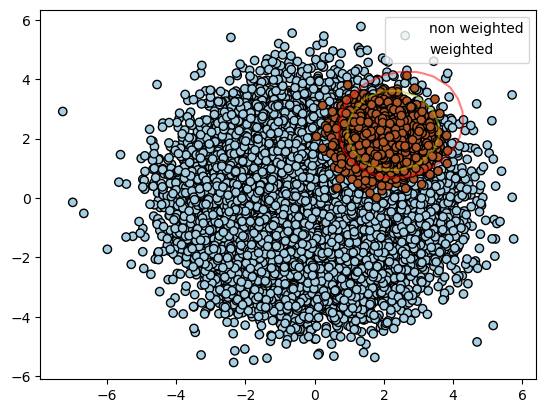

In [78]:
# To visualize the performance difference between normal and weighted(penalized) SVM with gaussian (rbf) kernel
#This portion of the code has been taken from the scikit-learn documnetation examples

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = y1_train.value_counts().iloc[0]
n_samples_2 = y1_train.value_counts().iloc[1]
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X3, y3 = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='rbf', C=optimal_C,gamma=optimal_gamma)
clf.fit(X3, y3)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='rbf', class_weight='balanced',C=optimal_C,gamma=optimal_gamma)
wclf.fit(X3, y3)

# plot the samples
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='y', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()


# Decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
depth_val = np.arange(1, 100)
param_grid = {'max_depth': depth_val}
dectree_clf = DecisionTreeClassifier()

fold = StratifiedKFold(n_splits=5, shuffle=True)  # Reduced the number of folds to 3

grid_search = GridSearchCV(dectree_clf, param_grid, cv=fold)

# Adjust the subset size based on your dataset size
subset_size = int(0.1 * len(train_data_array))  # For 10% subset size
grid_search.fit(train_data_array[:subset_size], training_label_array[:subset_size])

print("Best Training Accuracy (GridSearchCV):", grid_search.best_score_)
optimal_max_depth = grid_search.best_params_['max_depth']
print("Optimal Max Depth:", optimal_max_depth)


Best Training Accuracy (GridSearchCV): 0.8372193168310023
Optimal Max Depth: 5


In [80]:
#Decision Tree on test data

dectree_clf=DecisionTreeClassifier(max_depth =optimal_max_depth)
dectree_clf.fit(training_selected_features,y1_train)

predicted_label = dectree_clf.predict(testing_selected_features)
testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.8568942573446617
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7479
           1       0.78      0.54      0.64      2290

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769

0.7485376229570891


In [81]:
#Decision Tree on test data using PCA

dectree_clf=DecisionTreeClassifier(max_depth =optimal_max_depth)
dectree_clf.fit(training_features_transformed,y1_train)

predicted_label = dectree_clf.predict(testing_features_transformed)
testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.8393899068481933
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7479
           1       0.66      0.65      0.66      2290

    accuracy                           0.84      9769
   macro avg       0.78      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769

0.7746743282938955


# Random Forest

In [82]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming you have defined train_data_array and training_label_array

n_estimators_val = [50, 100, 200]  # Adjust the values as needed
max_depth_val = np.arange(1, 20)  # Adjust the range as needed

param_grid = {'n_estimators': n_estimators_val, 'max_depth': max_depth_val}
rf_clf = RandomForestClassifier()

fold = StratifiedKFold(n_splits=5, shuffle=True)

grid_search = GridSearchCV(rf_clf, param_grid, cv=fold)

# Adjust the subset size based on your dataset size
subset_size = int(0.1 * len(train_data_array))
grid_search.fit(train_data_array[:subset_size], training_label_array[:subset_size])

print("Best Training Accuracy (GridSearchCV):", grid_search.best_score_)
optimal_n_estimators = grid_search.best_params_['n_estimators']
optimal_max_depth = grid_search.best_params_['max_depth']
print("Optimal Hyperparameters: n_estimators:", optimal_n_estimators, "max_depth:", optimal_max_depth)

Best Training Accuracy (GridSearchCV): 0.8571783175219652
Optimal Hyperparameters: n_estimators: 100 max_depth: 6


In [83]:
#Random Forest on test data

rand_forest_clf=RandomForestClassifier(n_estimators = optimal_n_estimators)
rand_forest_clf.fit(training_selected_features,y1_train)

predicted_label = rand_forest_clf.predict(testing_selected_features)
testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.8523902139420616
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7479
           1       0.71      0.62      0.66      2290

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769

0.772560695420248


In [84]:
#Random Forest on test data using PCA

rand_forest_clf=RandomForestClassifier(n_estimators = optimal_n_estimators)
rand_forest_clf.fit(training_features_transformed,y1_train)

predicted_label = rand_forest_clf.predict(testing_features_transformed)
testing_accuracy=metrics.accuracy_score(y1_test,predicted_label)
print(testing_accuracy)
#report_an=metrics.precision_recall_fscore_support(testing_label,predicted_label,average='binary')  
#print(report_an)
report=metrics.classification_report(y1_test,predicted_label)
print(report)

auc_score=metrics.roc_auc_score(y1_test,predicted_label,average='macro')
print(auc_score)

0.8480908997850343
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7479
           1       0.70      0.61      0.65      2290

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

0.7658141778055703


# KNN 

In [85]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming you have defined train_data_array and training_label_array

n_neighbors_val = [3, 5, 7]  # Adjust the values as needed
weights_val = ['uniform', 'distance']  # Adjust the options as needed

param_grid = {'n_neighbors': n_neighbors_val, 'weights': weights_val}
knn_clf = KNeighborsClassifier()

fold = StratifiedKFold(n_splits=5, shuffle=True)

grid_search = GridSearchCV(knn_clf, param_grid, cv=fold)

# Adjust the subset size based on your dataset size
subset_size = int(0.1 * len(train_data_array))
grid_search.fit(train_data_array[:subset_size], training_label_array[:subset_size])

print("Best Training Accuracy (GridSearchCV):", grid_search.best_score_)
optimal_n_neighbors = grid_search.best_params_['n_neighbors']
optimal_weights = grid_search.best_params_['weights']
print("Optimal Hyperparameters: n_neighbors:", optimal_n_neighbors, "weights:", optimal_weights)

Best Training Accuracy (GridSearchCV): 0.8323517950296525
Optimal Hyperparameters: n_neighbors: 7 weights: uniform


In [86]:
# KNN on test data
knn_clf = KNeighborsClassifier(n_neighbors=optimal_n_neighbors)
knn_clf.fit(training_selected_features, y1_train)

predicted_label = knn_clf.predict(testing_selected_features)
testing_accuracy = accuracy_score(y1_test, predicted_label)
print("Testing Accuracy:", testing_accuracy)

report = classification_report(y1_test, predicted_label)
print(report)


Testing Accuracy: 0.8470672535571706
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7479
           1       0.69      0.62      0.66      2290

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [87]:
# KNN on test data
knn_clf = KNeighborsClassifier(n_neighbors=optimal_n_neighbors)
knn_clf.fit(training_features_transformed, y1_train)

predicted_label = knn_clf.predict(testing_features_transformed)
testing_accuracy = accuracy_score(y1_test, predicted_label)
print("Testing Accuracy:", testing_accuracy)

report = classification_report(y1_test, predicted_label)
print(report)



Testing Accuracy: 0.8468625243115979
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7479
           1       0.69      0.62      0.65      2290

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



# Random Forest Classifier with oversampling

In [88]:
#Code to calculate number of values in class 0 and class 1 
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    76.07 %
1    23.93 %
Name: income, dtype: object

In [89]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [90]:
#Importing library for random oversampling of dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [91]:
#Fitting imbalanced data to generate balanced datasets among classes 
ros.fit(X, y)

RandomOverSampler(random_state=42)

In [92]:
#Defining varibles resampled and storing resampled data to these variables
X_resampled, Y_resampled = ros.fit_resample(X, y)

In [93]:
#Percentage distribution of class 0 and class 1 after oversampling data
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

In [94]:
#Importing train test split libraries to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [95]:
#Count of number of records on X and Y variables
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (59448, 14)
X_test shape: (14862, 14)
Y_train shape: (59448,)
Y_test shape: (14862,)


In [96]:
#Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [97]:
#Fitting training dataset to random forest classifier
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [98]:
#Predict testing data using trained random forest model
Y_pred_ran_for = ran_for.predict(X_test)

In [99]:
#Importing libraries accuracy score,F1-SCORE,confusion matrix and roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [100]:
#Printing accuracy score and F-1 score using testing and predicted dataset
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 93.82
F1 score: 94.05


In [101]:
#Creating confusion matrix using predicted values and test dataset
cm = confusion_matrix(Y_test, Y_pred_ran_for)

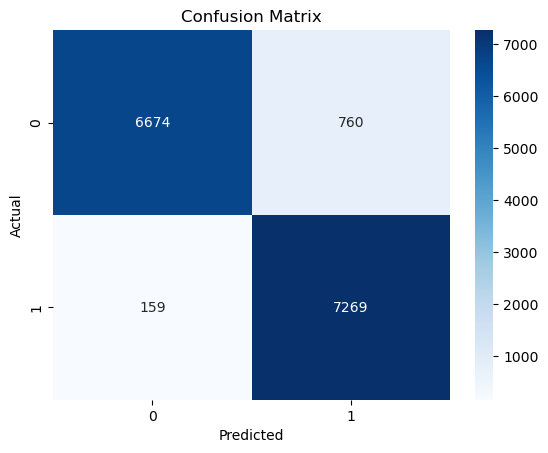

In [102]:
#Creating heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

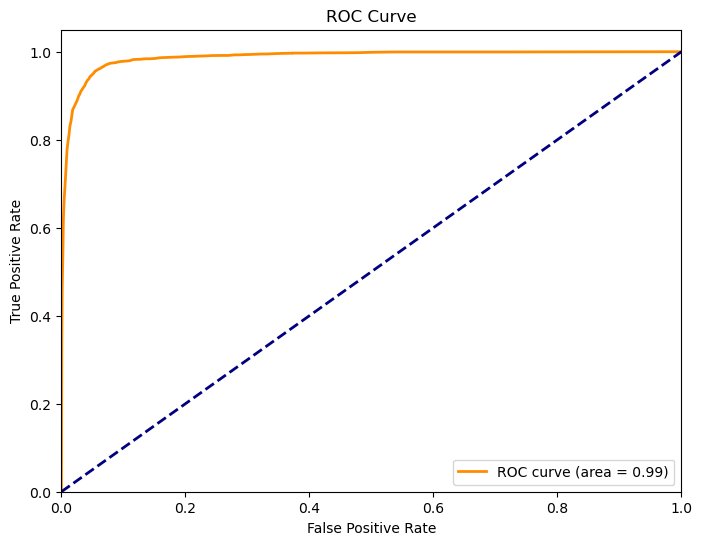

In [103]:
y_prob = ran_for.predict_proba(X_test)[:, 1]

# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Classifier with Oversampling

In [104]:
#importing Decision tree library 
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [105]:
#Fitting decision tree model dependent and independent variables 
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [106]:
#creating predict variable using test dataset 
Y_pred_dec_tree = dec_tree.predict(X_test)

In [107]:
#Printing Accuracy score and F1-Score for Decision tree classifier
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.93
F1 score: 92.32


In [108]:
#Creating confusion matrix for decision tree classifer
cm1 = confusion_matrix(Y_test, Y_pred_dec_tree)

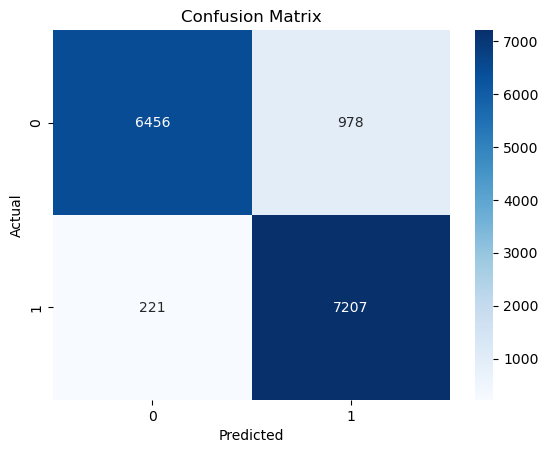

In [109]:
#Creating heatmap of confusion matrix for decision tree classifier 
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

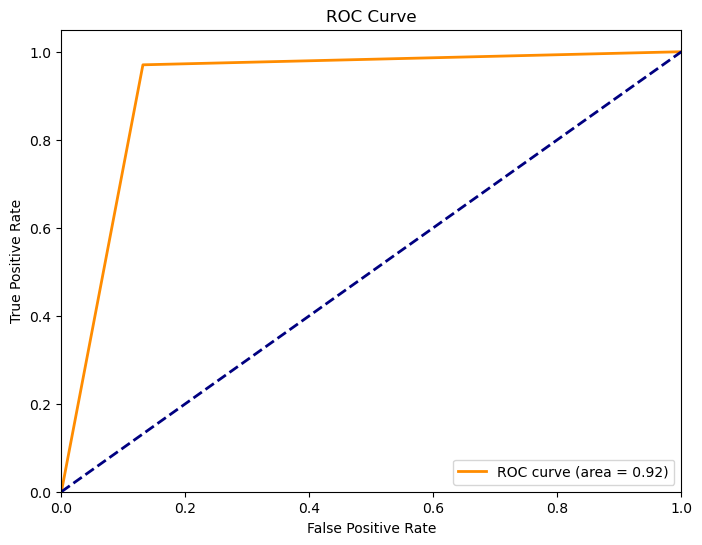

In [110]:
y_prob = dec_tree.predict_proba(X_test)[:, 1]

# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()